In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
freq, amp = np.loadtxt('data/fit_sinus.dat', unpack=True)

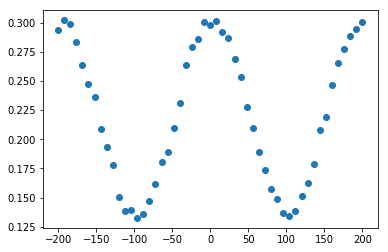

In [3]:
plt.plot(freq, amp, 'o')

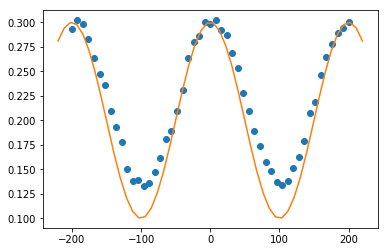

In [4]:
def frange(x, a, b, f_0, Delta_f):
    return a + b*np.cos(2*np.pi*(x-f_0)/Delta_f)

p0 = (0.2, 0.1, 0, 200)

f_plot = np.linspace(-220, 220)

plt.plot(freq, amp, 'o')
plt.plot(f_plot, frange(f_plot, *p0))

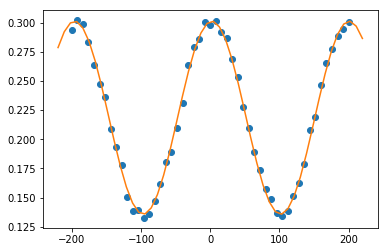

In [5]:
p_opt, p_cov = curve_fit(frange, freq, amp, p0=p0)
plt.plot(freq, amp, 'o')
plt.plot(f_plot, frange(f_plot, *p_opt))

In [6]:
a, b, f_0, Delta_f = p_opt
f_0

2.3676751760478263

In [7]:
np.sqrt(p_cov[2, 2])

0.31641156138612997

In [8]:
p_cov[2, 2]

0.10011627617880871

## 3

In [14]:
import inspect

def frange(x, a=0.2, b=0.1, f_0=0, Delta_f=200):
    return a + b*np.cos(2*np.pi*(x-f_0)/Delta_f)

inspect.getfullargspec(frange).args
inspect.getfullargspec(frange).defaults

def my_curve_fit(f, xdata, ydata, p0={}):
    # faire un dictionnaire avec les param par défaut
    # Update le dictionnaire avec p0
    # Faire de p0 une list
    # Appeler curve_fit
    # transformer la liste p_opt en dictionnaire
    name_of_parameters = inspect.getfullargspec(f).args[1:]
    default_value = inspect.getfullargspec(f).defaults
    initial_param = {name:val for name,val in zip(name_of_parameters, default_value)}
    initial_param.update(p0)
    p0_list = [initial_param[name] for name in name_of_parameters]
    p_cov, _ = curve_fit(f, xdata, ydata, p0_list)
    return {name:p_cov[i] for i, name in enumerate(name_of_parameters)}

my_curve_fit(frange, freq, amp)

{'a': 0.21844623436132074,
 'b': 0.0827777704723234,
 'f_0': 2.3676751760478263,
 'Delta_f': 198.43897897490515}

## Fit par un sinus


In [15]:
def fonction_sinus(t, offset=0, amplitude=1, phase=0, frequence=100):
    return offset + amplitude*np.sin(2*np.pi*frequence*t + phase)

class FitSinus(object):
    def __init__(self, temps, signal, frequence):
        p_ini = {}
        p_ini["freq"] = frequence
        p_ini["amplitude"] = (signal.max() - signal.min())/2
        p_ini["offset"] = signal.mean()
        popt = my_curve_fit(fonction_sinus, temps, signal, p_ini)
        print(popt)
        self.popt = popt
        self.amplitude = popt['amplitude']
        self.phase = popt['phase']
        if self.amplitude<0:
            self.amplitude, self.phase = -self.amplitude, (self.phase + np.pi)%(2*np.pi)


In [16]:
frequence = 200
dt = 1E-6
temps = dt*np.arange(5000)
signal_reference = np.sin(2*np.pi*frequence*temps - 0.2)
signal_reference += 0.05*np.random.normal(size=len(temps))

fit_sin_ref = FitSinus(temps, signal_reference, frequence)
fit_sin_ref.popt

{'offset': 0.00020508842772685252, 'amplitude': 0.9995372085347245, 'phase': -0.201722732536788, 'frequence': 200.0020670457766}


{'offset': 0.00020508842772685252,
 'amplitude': 0.9995372085347245,
 'phase': -0.201722732536788,
 'frequence': 200.0020670457766}